In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
traindata = pd.read_csv("/content/drive/MyDrive/CSE422/Training.csv")
testdata = pd.read_csv("/content/drive/MyDrive/CSE422/Testing.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindata

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [ ]:

print(len(traindata.index))
print(len(testdata.index))

4920
42


In [ ]:
data = testdata.append(traindata)
print(len(data.index))

4962



# Preprocessing






In [ ]:
print(data.isnull().values.any())
print(data.isnull().sum())

True
itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4962
Length: 134, dtype: int64


In [ ]:
data.drop('Unnamed: 133', axis = 1, inplace=True)
data.drop('fluid_overload', axis = 1, inplace=True) #Unused Variable
data.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 132, dtype: int64

# **Visualization**





<BarContainer object of 131 artists>

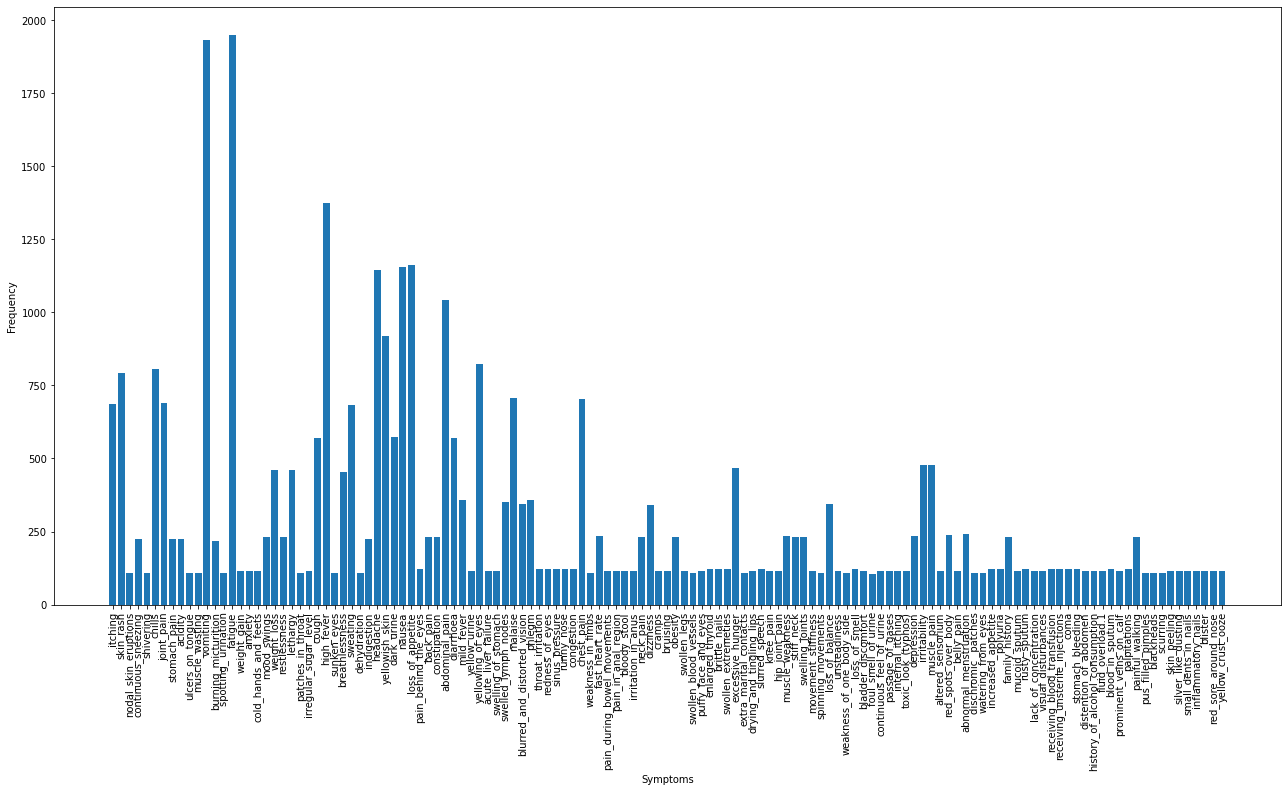

In [ ]:

l = []
sym = list(data.drop('prognosis',axis=1))
arr = np.array(sym)
arr2 = np.array(l)
plt.figure(figsize = (22,11))
for j in sym:
    h = data[j].value_counts().values
    #print(h)
    arr2 = np.append(arr2,h[1])
plt.xticks(rotation = 90)
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.bar(arr,arr2)


# **Model Training**

In [ ]:
x = data.drop('prognosis',axis=1)
y = data['prognosis']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)
     

In [ ]:
x.shape

(4962, 131)

In [ ]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
pred = LR.predict(xtest)
LR_score = LR.score(xtest, ytest)
print("LR Accuracy: {:.2f}%".format(LR_score*100))

LR Accuracy: 100.00%


In [ ]:
#print(classification_report(ytest, pred))

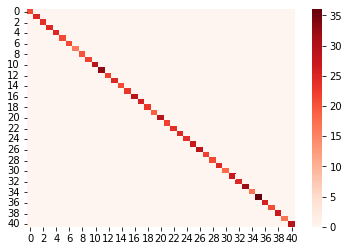

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
#print(confusion_matrix(ytest, pred))
y_LR = LR.predict(xtest)
cm = confusion_matrix(ytest, y_LR)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(xtrain, ytrain)
pred = DT.predict(xtest)
DT_score = DT.score(xtest, ytest)
print("DT Accuracy: {:.2f}%".format(DT_score * 100))

DT Accuracy: 100.00%


In [ ]:
#print(classification_report(ytest, pred))

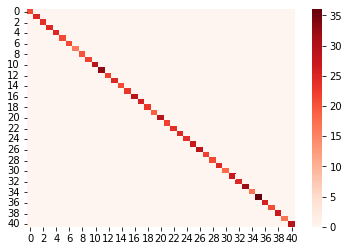

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_DT = DT.predict(xtest)
cm = confusion_matrix(ytest, y_DT)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
naivebayes = GaussianNB()
naivebayes.fit(xtrain,ytrain)
pred = naivebayes.predict(xtest)
score = naivebayes.score(xtest, ytest)
print("Naive Bayes Accuracy {}%".format(score*100))

Naive Bayes Accuracy 100.0%


In [ ]:
print(classification_report(ytest, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        21
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        25
                              Arthritis       1.00      1.00      1.00        21
                       Bronchial Asthma       1.00      1.00      1.00        21
                   Cervical spondylosis       1.00      1.00      1.00        16
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        22
                            Common Cold       1.00      1.00      1.00        29
                           

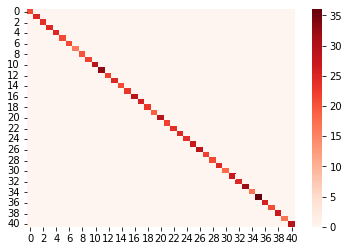

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_NB = naivebayes.predict(xtest)
cm = confusion_matrix(ytest, y_NB)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain, ytrain)
pred = knn_model.predict(xtest)
score = knn_model.score(xtest, ytest)
print("Accuracy score for KNN is {}%".format(score*100))

Accuracy score for KNN is 100.0%


In [ ]:
#print(classification_report(ytest, pred))

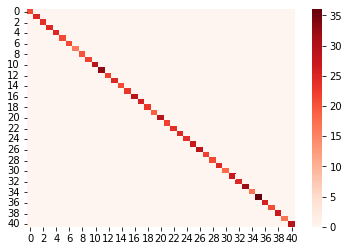

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_knn = knn_model.predict(xtest)
cm = confusion_matrix(ytest, y_knn)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

# **Data Reducing**

In [ ]:
coefficients = np.mean(LR.coef_, axis=0)
importance_threshold = np.quantile(np.abs(coefficients), q=0.25)
 
fig = px.bar(
    x=coefficients,
    y=xtrain.columns,
    orientation='h',
    color=coefficients,
    color_continuous_scale=[(0, 'green'), (1, 'blue')],
    labels={'x': "Coefficient Value", 'y': "Feature"},
    title="Feature Importance From Model Weights"
)
 
fig.add_vline(x=importance_threshold, line_color='violet')
fig.add_vline(x=-importance_threshold, line_color='violet')
fig.add_vrect(x0=importance_threshold, x1=-importance_threshold, line_width=0, fillcolor='red', opacity=0.5)
 
fig.show()
 


In [ ]:
low_importance_features = xtrain.columns[np.abs(coefficients) < importance_threshold]
low_importance_features


Index(['nodal_skin_eruptions', 'stomach_pain', 'muscle_wasting',
       'spotting_ urination', 'weight_loss', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'dehydration', 'pain_behind_the_eyes',
       'yellow_urine', 'swelled_lymph_nodes', 'malaise', 'chest_pain',
       'excessive_hunger', 'extra_marital_contacts', 'knee_pain',
       'hip_joint_pain', 'passage_of_gases', 'internal_itching', 'muscle_pain',
       'dischromic _patches', 'increased_appetite', 'polyuria', 'rusty_sputum',
       'pus_filled_pimples', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object')

In [ ]:
data_reduced = data.drop(low_importance_features, axis=1)
data_reduced.shape


(4962, 99)

# **Reduced Model Training**

In [ ]:
x = data_reduced.drop('prognosis',axis=1)
y = data_reduced['prognosis']
 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
LR_reduced_score = LR.score(xtest, ytest)
 
print("Reduced LR accuracy: {:.2f}%".format(LR_reduced_score * 100))

Reduced LR accuracy: 99.19%


In [ ]:
#print(classification_report(ytest, pred))

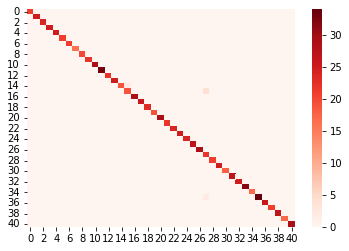

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_LR = LR.predict(xtest)
cm = confusion_matrix(ytest, y_LR)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(xtrain, ytrain)
pred = DT.predict(xtest)
DT_score = DT.score(xtest, ytest)
print("Reduced DT Accuracy: {:.2f}%".format(DT_score * 100))

Reduced DT Accuracy: 99.19%


In [ ]:
#print(classification_report(ytest, pred))

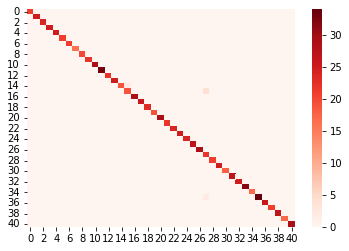

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_DT = DT.predict(xtest)
cm = confusion_matrix(ytest, y_DT)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
naivebayes = GaussianNB()
naivebayes.fit(xtrain,ytrain)
pred = naivebayes.predict(xtest)
score = naivebayes.score(xtest,ytest)
print("Reduced Naive Bayes Accuracy {}%".format(score*100))

Reduced Naive Bayes Accuracy 97.48237663645519%


In [ ]:
#print(classification_report(ytest, pred))

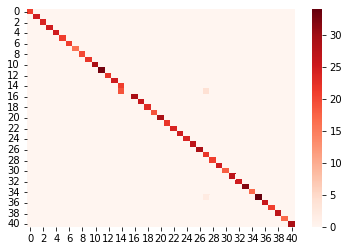

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_NB = naivebayes.predict(xtest)
cm = confusion_matrix(ytest, y_NB)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain, ytrain)
pred = knn_model.predict(xtest)
score = knn_model.score(xtest,ytest)
print("Reduced Accuracy score for KNN is {}%".format(score*100))

Reduced Accuracy score for KNN is 99.19436052366567%


In [ ]:
#print(classification_report(ytest, pred))

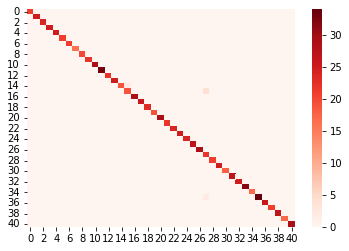

Confusion Matrix is
 [[21  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 29]]


In [ ]:
y_knn = knn_model.predict(xtest)
cm = confusion_matrix(ytest, y_knn)
sns.heatmap(cm, cmap="Reds")
plt.show()
print('Confusion Matrix is\n', cm)